In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/ResearchPaper/traffic_sign_classification_dataset/train'
test_path = '/content/drive/MyDrive/ResearchPaper/traffic_sign_classification_dataset/test'

Working with 36 images
Image examples: 
05017.jpg


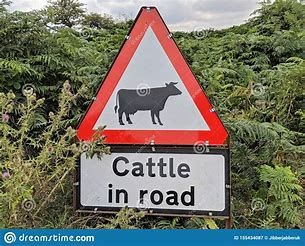

05030.jpg


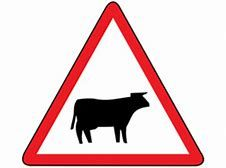

05023.jpg


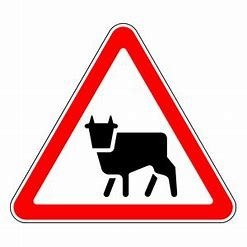

05006.jpg


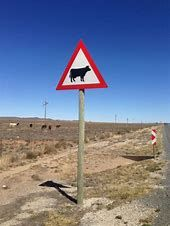

05019.jpg


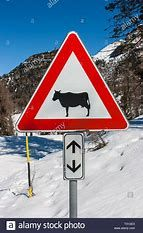

05014.jpg


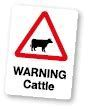

05022.jpg


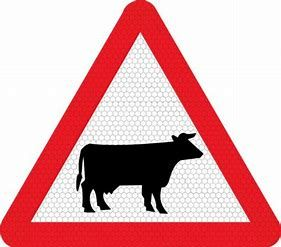

05032.jpg


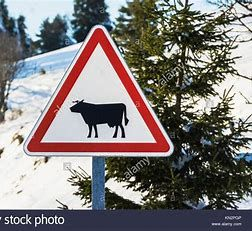

05016.jpg


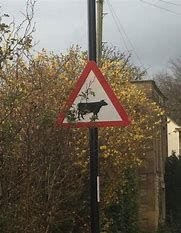

05033.jpg


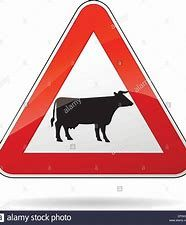

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/CATTLE'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))


In [ ]:
data_dir="/content/drive/MyDrive/ResearchPaper/traffic_sign_classification_dataset"

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3277 files belonging to 2 classes.
Using 2950 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3277 files belonging to 2 classes.
Using 983 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['test', 'train']


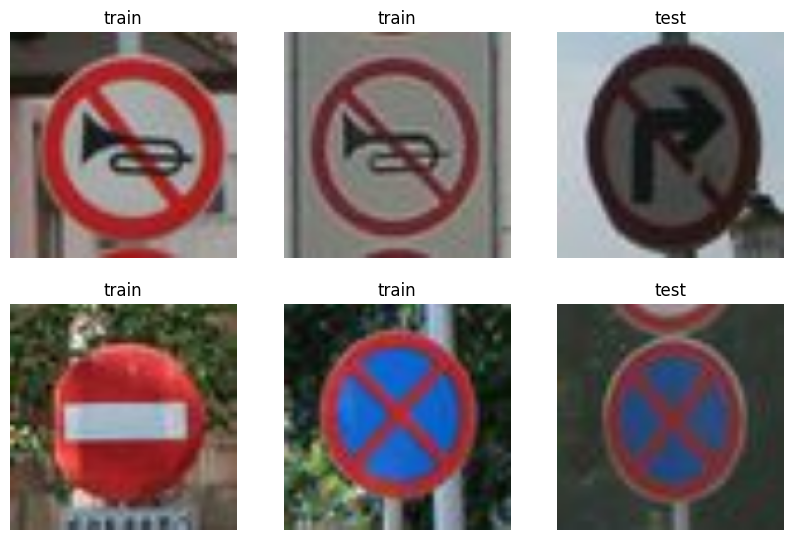

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [10]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(85, activation='softmax'))

94765736/94765736 [==============================] - 5s 0us/step


In [11]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 1024)              2098176   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 85)                87125     
 apper)                                                          
                                                                 
Total params: 25773013 (98.32 MB)
Trainable params: 2185301 (8.34 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [12]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
epochs=20
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
93/93 [==============================] - 1167s 12s/step - loss: 0.7824 - accuracy: 0.6973 - val_loss: 0.4824 - val_accuracy: 0.7904
Epoch 2/20
93/93 [==============================] - 39s 397ms/step - loss: 0.5124 - accuracy: 0.7675 - val_loss: 0.4042 - val_accuracy: 0.8220
Epoch 3/20
93/93 [==============================] - 37s 381ms/step - loss: 0.4413 - accuracy: 0.7925 - val_loss: 0.4112 - val_accuracy: 0.8026
Epoch 4/20
93/93 [==============================] - 39s 387ms/step - loss: 0.4562 - accuracy: 0.7854 - val_loss: 0.4975 - val_accuracy: 0.7202
Epoch 5/20
93/93 [==============================] - 39s 400ms/step - loss: 0.3853 - accuracy: 0.8142 - val_loss: 0.5368 - val_accuracy: 0.7111
Epoch 6/20
93/93 [==============================] - 39s 400ms/step - loss: 0.3834 - accuracy: 0.8258 - val_loss: 0.4849 - val_accuracy: 0.7538
Epoch 7/20
93/93 [==============================] - 39s 399ms/step - loss: 0.3793 - accuracy: 0.8166 - val_loss: 0.3814 - val_accuracy: 0.8220

# Evaluating The Model

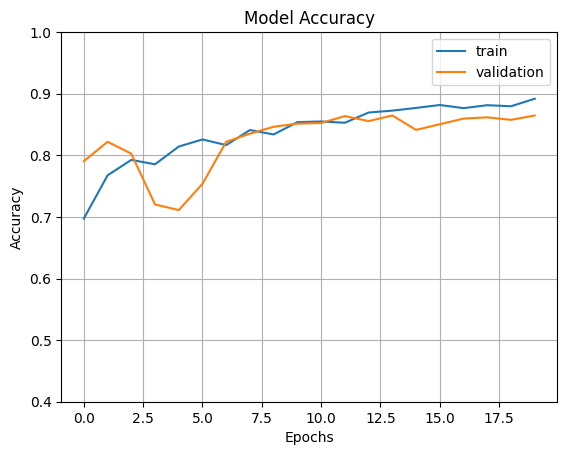

In [14]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

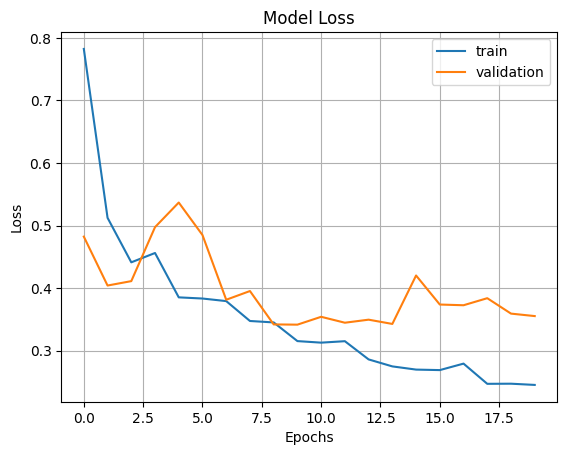

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [16]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# 1. Training accuracy and testing accuracy
train_accuracy = history.history['accuracy'][-1]
test_loss, test_accuracy = resnet_model.evaluate(val_ds)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

31/31 [==============================] - 11s 286ms/step - loss: 0.3553 - accuracy: 0.8647
Training Accuracy: 89.19%
Testing Accuracy: 86.47%


In [17]:
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())


1/1 [==============================] - 1s 1s/step


In [27]:
report = classification_report(y_true, y_pred, target_names=class_names)
confusion = confusion_matrix(y_true, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Classification Report:
               precision    recall  f1-score   support

        test       0.84      0.78      0.81       367
       train       0.88      0.91      0.89       616

    accuracy                           0.86       983
   macro avg       0.86      0.85      0.85       983
weighted avg       0.86      0.86      0.86       983

Confusion Matrix:
 [[288  79]
 [ 54 562]]


In [19]:
##TRIAL

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the validation dataset and collect predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 0s 27ms/step
Confusion Matrix:
[[288  79]
 [ 54 562]]


1/1 [==============================] - 0s 28ms/step


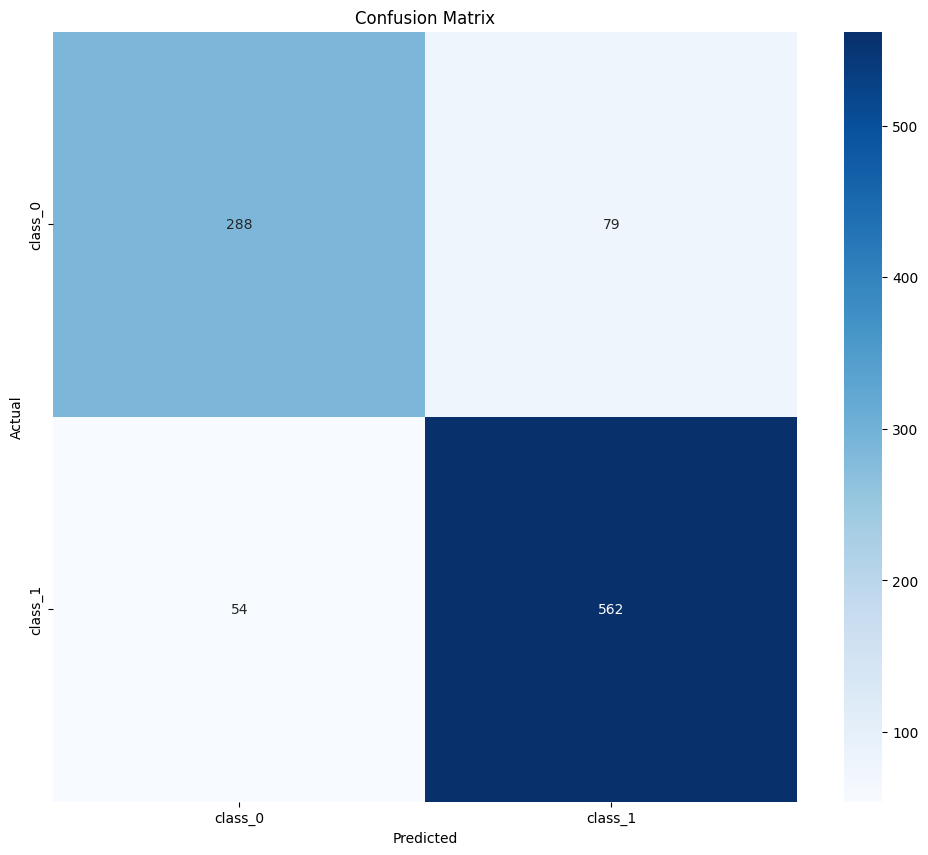

In [26]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Evaluate the model on the validation dataset and collect predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class labels (assuming your classes are named as class_0, class_1, ..., class_84)
class_labels = [f"class_{i}" for i in range(85)]

# Plot the confusion matrix with labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
